In [7]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7b3b7d22-a929-4a6f-89f9-1a1e779aba44',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-08-24T07:06:32.097Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 9989}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11649, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [33]:
import pandas as pd

#Allows to see all the columns
pd.set_option('display.max.columns',None)
pd.set_option('display.max.rows',None)

In [37]:
#Normalizes the data and makes the data pretty

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11649,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974436e+07,1.974436e+07,False,NaN,1,NaN,NaN,None,2024-08-24T07:05:00.000Z,64186.004858,4.306611e+10,65.2392,0.255462,4.868839,8.473680,-0.202474,4.913368,-7.103661,1.267312e+12,56.1950,1.347906e+12,None,2024-08-24T07:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:33:38.237925
1,1027,Ethereum,ETH,ethereum,9243,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202985e+08,1.202985e+08,True,NaN,2,NaN,NaN,None,2024-08-24T07:04:00.000Z,2759.295353,1.583856e+10,37.6651,0.067761,2.873266,6.183891,-12.999412,-18.140498,-26.629105,3.319390e+11,14.7165,3.319390e+11,None,2024-08-24T07:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:33:38.237925
2,825,Tether USDt,USDT,tether,95298,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.176760e+11,1.202564e+11,True,NaN,3,NaN,NaN,None,2024-08-24T07:04:00.000Z,1.000650,6.623558e+10,46.3665,-0.007298,0.044628,0.050466,0.079666,0.115482,0.096998,1.177526e+11,5.2206,1.203346e+11,None,2024-08-24T07:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-24 15:33:38.237925
3,1839,BNB,BNB,bnb,2218,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459355e+08,1.459355e+08,False,NaN,4,NaN,NaN,None,2024-08-24T07:04:00.000Z,577.937032,2.096952e+09,1.9874,-0.226780,-0.521637,10.735293,2.623614,0.917912,-4.034072,8.434152e+10,3.7401,8.434152e+10,None,2024-08-24T07:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:33:38.237925
4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.659278e+08,5.828834e+08,True,NaN,5,NaN,NaN,None,2024-08-24T07:04:00.000Z,154.306779,2.792059e+09,96.6364,-0.171236,5.925937,10.894165,-10.110191,13.611519,-7.080715,7.189582e+10,3.1879,8.994285e+10,None,2024-08-24T07:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:33:38.237925
5,3408,USDC,USDC,usd-coin,21659,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.492038e+10,3.492038e+10,False,NaN,6,NaN,NaN,None,2024-08-24T07:04:00.000Z,0.999944,8.294389e+09,69.4153,-0.007380,-0.002144,0.004048,-0.009791,-0.003009,0.001343,3.491844e+10,1.5483,3.491844e+10,None,2024-08-24T07:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-24 15:33:38.237925
6,52,XRP,XRP,xrp,1370,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.618009e+10,9.998732e+10,False,NaN,7,NaN,NaN,None,2024-08-24T07:05:00.000Z,0.611651,1.159720e+09,22.1376,0.376640,1.808709,8.204849,-0.045373,28.579043,13.670693,3.436260e+10,1.5233,6.116508e+10,None,2024-08-24T07:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:33:38.237925
7,11419,Toncoin,TON,toncoin,523,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.527144e+09,5.110991e+09,True,NaN,8,3.414167e+09,2.286916e+10,None,2024-08-24T07:04:00.000Z,6.698315,2.576711e+08,30.2371,0.148149,1.425997,2.644874,1.236461,-11.815336,5.220743,1.692761e+10,0.7507,3.423503e+10,None,2024-08-24T07:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:33:38.237925
8,74,Dogecoin,DOGE,dogecoin,1044,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1

In [64]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '7b3b7d22-a929-4a6f-89f9-1a1e779aba44',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')

    if not os.path.isfile(r'C:\Users\LENOVO\Desktop\DATA ANALYTICS\5. Python\Project#2\API.csv'):
        df.to_csv(r'C:\Users\LENOVO\Desktop\DATA ANALYTICS\5. Python\Project#2\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\LENOVO\Desktop\DATA ANALYTICS\5. Python\Project#2\API.csv', mode = 'a', header = False)

In [155]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print ('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [75]:
df30 = pd.read_csv(r'C:\Users\LENOVO\Desktop\DATA ANALYTICS\5. Python\Project#2\API.csv')
df30

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11649,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.974440e+07,1.974440e+07,False,NaN,1,NaN,NaN,NaN,2024-08-24T07:56:00.000Z,64311.086781,4.317180e+10,65.8248,0.297508,5.233493,8.594411,0.282214,6.065105,-7.163469,1.269784e+12,56.1742,1.350533e+12,NaN,2024-08-24T07:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:58:45.786665
1,1,1027,Ethereum,ETH,ethereum,9243,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202985e+08,1.202985e+08,True,NaN,2,NaN,NaN,NaN,2024-08-24T07:55:00.000Z,2760.327917,1.601684e+10,38.6808,0.053646,3.387245,6.225851,-12.950831,-17.889824,-27.099657,3.320632e+11,14.6919,3.320632e+11,NaN,2024-08-24T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:58:45.786665
2,2,825,Tether USDt,USDT,tether,95298,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.176760e+11,1.202564e+11,True,NaN,3,NaN,NaN,NaN,2024-08-24T07:55:00.000Z,1.000600,6.644914e+10,46.3432,-0.002828,0.049188,0.041062,0.085234,0.107083,0.093960,1.177467e+11,5.2096,1.203286e+11,NaN,2024-08-24T07:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-24 15:58:45.786665
3,3,1839,BNB,BNB,bnb,2218,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459355e+08,1.459355e+08,False,NaN,4,NaN,NaN,NaN,2024-08-24T07:55:00.000Z,579.199465,2.097590e+09,1.6183,0.038950,-0.154865,10.766707,3.134569,1.419306,-4.039235,8.452575e+10,3.7395,8.452575e+10,NaN,2024-08-24T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:58:45.786665
4,4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.659277e+08,5.828833e+08,True,NaN,5,NaN,NaN,NaN,2024-08-24T07:55:00.000Z,154.630075,2.804214e+09,97.4192,0.212363,6.524280,10.977100,-8.912343,14.486270,-6.271399,7.204644e+10,3.1874,9.013128e+10,NaN,2024-08-24T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:58:45.786665
5,5,3408,USDC,USDC,usd-coin,21661,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.492028e+10,3.492028e+10,False,NaN,6,NaN,NaN,NaN,2024-08-24T07:55:00.000Z,0.999971,8.273521e+09,68.1104,-0.000579,0.005791,0.009528,0.007496,-0.010560,-0.000492,3.491925e+10,1.5448,3.491925e+10,NaN,2024-08-24T07:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-24 15:58:45.786665
6,6,52,XRP,XRP,xrp,1370,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.618009e+10,9.998732e+10,False,NaN,7,NaN,NaN,NaN,2024-08-24T07:56:00.000Z,0.610223,1.136433e+09,16.8792,-0.164359,1.831110,8.071291,-0.171298,28.017390,13.217361,3.428236e+10,1.5168,6.102226e+10,NaN,2024-08-24T07:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:58:45.786665
7,7,11419,Toncoin,TON,toncoin,523,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.527146e+09,5.110993e+09,True,NaN,8,3.414167e+09,2.292819e+10,NaN,2024-08-24T07:55:00.000Z,6.715603,2.559166e+08,28.5752,0.223735,2.145695,2.693561,1.619787,-11.395221,6.225127,1.697131e+10,0.7508,3.432340e+10,NaN,2024-08-24T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:58:45.786665
8,8,74,Dogecoin,DOGE,dogecoin,1044,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha.

In [81]:
pd.set_option('display.float_format', lambda x : '%.5f' % x)

In [83]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11649,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19744400.00000,19744400.00000,False,NaN,1,NaN,NaN,None,2024-08-24T08:01:00.000Z,64341.62004,43225482300.21284,66.56380,0.37000,5.35667,8.57465,0.35878,6.07527,-7.16611,1270386682634.56567,56.20550,1351174020751.50000,None,2024-08-24T08:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 16:02:22.879301
1,1027,Ethereum,ETH,ethereum,9243,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120298473.02453,120298473.02453,True,NaN,2,NaN,NaN,None,2024-08-24T08:00:00.000Z,2760.55161,16007945183.25239,38.59490,0.10588,3.40024,6.15421,-12.95512,-17.79959,-27.05681,332090143698.38470,14.68940,332090143698.38000,None,2024-08-24T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 16:02:22.879301
2,825,Tether USDt,USDT,tether,95298,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,117676046786.11433,120256419986.32834,True,NaN,3,NaN,NaN,None,2024-08-24T08:00:00.000Z,1.00055,66497349903.99601,46.66390,-0.00856,0.03830,0.03528,0.07141,0.09544,0.09733,117740475844.64931,5.20800,120322261830.39000,None,2024-08-24T08:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-24 16:02:22.879301
3,1839,BNB,BNB,bnb,2218,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145935478.60054,145935478.60054,False,NaN,4,NaN,NaN,None,2024-08-24T08:00:00.000Z,579.34722,2097494655.82529,1.91300,0.46098,-0.12789,10.75016,3.13332,1.38917,-4.02831,84547313914.24971,3.73970,84547313914.25000,None,2024-08-24T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 16:02:22.879301
4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,465927706.73974,582883269.90234,True,NaN,5,NaN,NaN,None,2024-08-24T08:00:00.000Z,154.67270,2807772973.40184,98.28080,0.27237,6.52363,10.93157,-8.78317,14.76520,-6.36668,72066294749.30568,3.18800,90156127067.77000,None,2024-08-24T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 16:02:22.879301
5,3408,USDC,USDC,usd-coin,21661,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34920275453.81082,34920275453.81082,False,NaN,6,NaN,NaN,None,2024-08-24T08:00:00.000Z,0.99988,8274202104.46229,68.67770,-0.01606,-0.00610,-0.00889,-0.01816,-0.02512,0.00105,34916040486.87592,1.54480,34916040486.88000,None,2024-08-24T08:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-24 16:02:22.879301
6,52,XRP,XRP,xrp,1370,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56180094752.00000,99987315360.00000,False,NaN,7,NaN,NaN,None,2024-08-24T08:01:00.000Z,0.60948,1136657264.34862,17.01030,-0.30827,1.67901,7.88696,0.03935,28.00918,13.03220,34240435536.76734,1.51460,60947628671.54000,None,2024-08-24T08:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 16:02:22.879301
7,11419,Toncoin,TON,toncoin,523,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2527146475.96300,5110993296.66618,True,NaN,8,3414166606.00000,22932765929.28635,None,2024-08-24T08:00:00.000Z,6.71694,256051938.13223,29.07890,0.26731,2.15114,2.62227,1.59202,-11.28708,6.20546,16974701381.13121,0.75080,34330255803.16000,None,2024-08-24T08:00:00.0

In [93]:
#Coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.37000,5.35667,8.57465,0.35878,6.07527,-7.16611
Ethereum,0.10588,3.40024,6.15421,-12.95512,-17.79959,-27.05681
Tether USDt,-0.00856,0.03830,0.03528,0.07141,0.09544,0.09733
BNB,0.46098,-0.12789,10.75016,3.13332,1.38917,-4.02831
Solana,0.27237,6.52363,10.93157,-8.78317,14.76520,-6.36668
USDC,-0.01606,-0.00610,-0.00889,-0.01816,-0.02512,0.00105
XRP,-0.30827,1.67901,7.88696,0.03935,28.00918,13.03220
Toncoin,0.26731,2.15114,2.62227,1.59202,-11.28708,6.20546
Dogecoin,-0.01354,4.84162,11.04850,-9.08751,-7.81166,-34.82038


In [95]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.37000
             quote.USD.percent_change_24h     5.35667
             quote.USD.percent_change_7d      8.57465
             quote.USD.percent_change_30d     0.35878
             quote.USD.percent_change_60d     6.07527
             quote.USD.percent_change_90d    -7.16611
Ethereum     quote.USD.percent_change_1h      0.10588
             quote.USD.percent_change_24h     3.40024
             quote.USD.percent_change_7d      6.15421
             quote.USD.percent_change_30d   -12.95512
             quote.USD.percent_change_60d   -17.79959
             quote.USD.percent_change_90d   -27.05681
Tether USDt  quote.USD.percent_change_1h     -0.00856
             quote.USD.percent_change_24h     0.03830
             quote.USD.percent_change_7d      0.03528
             quote.USD.percent_change_30d     0.07141
             quote.USD.percent_change_60d     0.09544
             quote.USD.percent_change_90

In [99]:
type(df4)

pandas.core.series.Series

In [103]:
df5 = df4.to_frame(name='values')
df5.count()

values    90
dtype: int64

In [139]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.37000
1,Bitcoin,quote.USD.percent_change_24h,5.35667
2,Bitcoin,quote.USD.percent_change_7d,8.57465
3,Bitcoin,quote.USD.percent_change_30d,0.35878
4,Bitcoin,quote.USD.percent_change_60d,6.07527
5,Bitcoin,quote.USD.percent_change_90d,-7.16611
6,Ethereum,quote.USD.percent_change_1h,0.10588
7,Ethereum,quote.USD.percent_change_24h,3.40024
8,Ethereum,quote.USD.percent_change_7d,6.15421
9,Ethereum,quote.USD.percent_change_30d,-12.95512


In [141]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.37000
1,Bitcoin,quote.USD.percent_change_24h,5.35667
2,Bitcoin,quote.USD.percent_change_7d,8.57465
3,Bitcoin,quote.USD.percent_change_30d,0.35878
4,Bitcoin,quote.USD.percent_change_60d,6.07527
5,Bitcoin,quote.USD.percent_change_90d,-7.16611
6,Ethereum,quote.USD.percent_change_1h,0.10588
7,Ethereum,quote.USD.percent_change_24h,3.40024
8,Ethereum,quote.USD.percent_change_7d,6.15421
9,Ethereum,quote.USD.percent_change_30d,-12.95512


In [145]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.37000
1,Bitcoin,24h,5.35667
2,Bitcoin,7d,8.57465
3,Bitcoin,30d,0.35878
4,Bitcoin,60d,6.07527
5,Bitcoin,90d,-7.16611
6,Ethereum,1h,0.10588
7,Ethereum,24h,3.40024
8,Ethereum,7d,6.15421
9,Ethereum,30d,-12.95512


In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

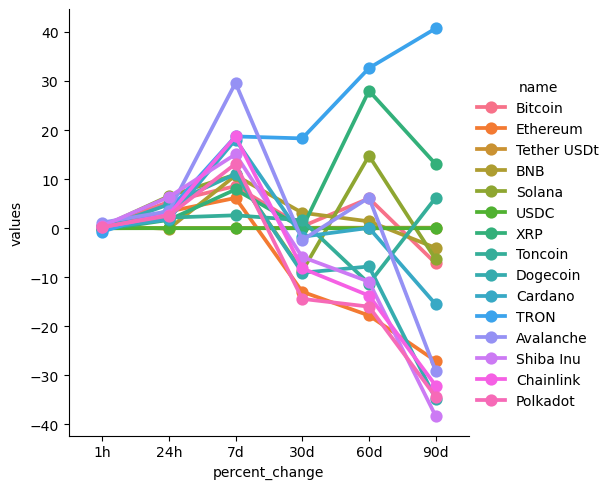

In [147]:
sns.catplot(x = 'percent_change', y = 'values', hue='name',data=df7, kind = 'point')

In [151]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name== 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,64341.62004,2024-08-24 16:02:22.879301
